In [2]:
# Importing required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading the Dataset

df = pd.read_csv(r'C:\Users\nithi\OneDrive\Desktop\EDA PROJECT\archive\SuicideChina.csv')

## 1. HANDLE MISSING DATA

In [4]:
# Identify which columns are missing or have null values

df.isna().sum()

Unnamed: 0      0
Person_ID       0
Hospitalised    0
Died            0
Urban           0
Year            0
Month           0
Sex             0
Age             0
Education       0
Occupation      0
method          0
dtype: int64

### Data Insights

- No missing / null values found in any column.
- All 12 columns have 2571 non-null values.

## 2. REMOVE DUPLICATES

In [6]:
# Check if there are any identical records present in the dataset

df.duplicated().sum()

np.int64(0)

### Data Insights

- 0 duplicate records found.

## 3. FIX INCONSISTENCIES IN CATEGORICAL DATA

In [11]:
# Review text data for inconsistency in spelling, case, or formatting

for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())
    print('----------------------------')



Value counts for Hospitalised:
Hospitalised
yes    1553
no     1018
Name: count, dtype: int64
----------------------------

Value counts for Died:
Died
no     1315
yes    1256
Name: count, dtype: int64
----------------------------

Value counts for Urban:
Urban
no         2213
yes         277
unknown      81
Name: count, dtype: int64
----------------------------

Value counts for Sex:
Sex
female    1328
male      1243
Name: count, dtype: int64
----------------------------

Value counts for Education:
Education
secondary    1280
primary       659
iliterate     533
unknown        80
tertiary       19
Name: count, dtype: int64
----------------------------

Value counts for Occupation:
Occupation
farming             2032
household            248
others/unknown       156
professional          37
student               35
unemployed            30
business/service      21
worker                 6
others                 3
retiree                3
Name: count, dtype: int64
---------------------

### Data Insight:

All categorical columns show consistent values with no spelling, case or formatting inconsistencies.

## CONVERT DATA TYPES

In [14]:
# Checking the datatypes

df.dtypes

Unnamed: 0       int64
Person_ID        int64
Hospitalised    object
Died            object
Urban           object
Year             int64
Month            int64
Sex             object
Age              int64
Education       object
Occupation      object
method          object
dtype: object

##### ***Data Insights:***
- Year, Month, and Age columns are already in int64 format and are suitable for numerical analysis.
- Hospitalised, Died, Urban, Sex, Education, Occupation, and method columns are categorical but stored as object, so they need conversion to category data type.
- The Unnamed: 0 column acts as an index and does not add analytical value, hence it can be removed.

## CONVERSIONS APPLIED

In [16]:
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)

for col in cat_cols:
    df[col] = df[col].astype('category')


In [17]:
df.dtypes

Unnamed: 0         int64
Person_ID          int64
Hospitalised    category
Died            category
Urban           category
Year               int64
Month              int64
Sex             category
Age                int64
Education       category
Occupation      category
method          category
dtype: object

### Data Insights:

- Year and Month columns are now in int data type, making them suitable for numerical analysis.
- All categorical columns have been converted from object to category data type.
- This conversion improves memory efficiency and grouping performance.
- The dataset is now well-structured and analysis-ready.


## DATA ANALYSIS THROUGH VISUALIZATION

### Univariate Analysis

#### We can use histogram and box plot to visualize the distribution of numerical columns.
- In the SuicideChina dataset, the numerical columns are Age, Year, and Month.
- All these columns are suitable for histogram analysis as they represent ordered numerical data.
- No numerical columns were excluded from the analysis.

##### Numerical Columns:
Age, Year, Month

In [20]:
#Identifying Numerical Columns

df.select_dtypes(include=['int64', 'float64']).columns

Index(['Unnamed: 0', 'Person_ID', 'Year', 'Month', 'Age'], dtype='object')

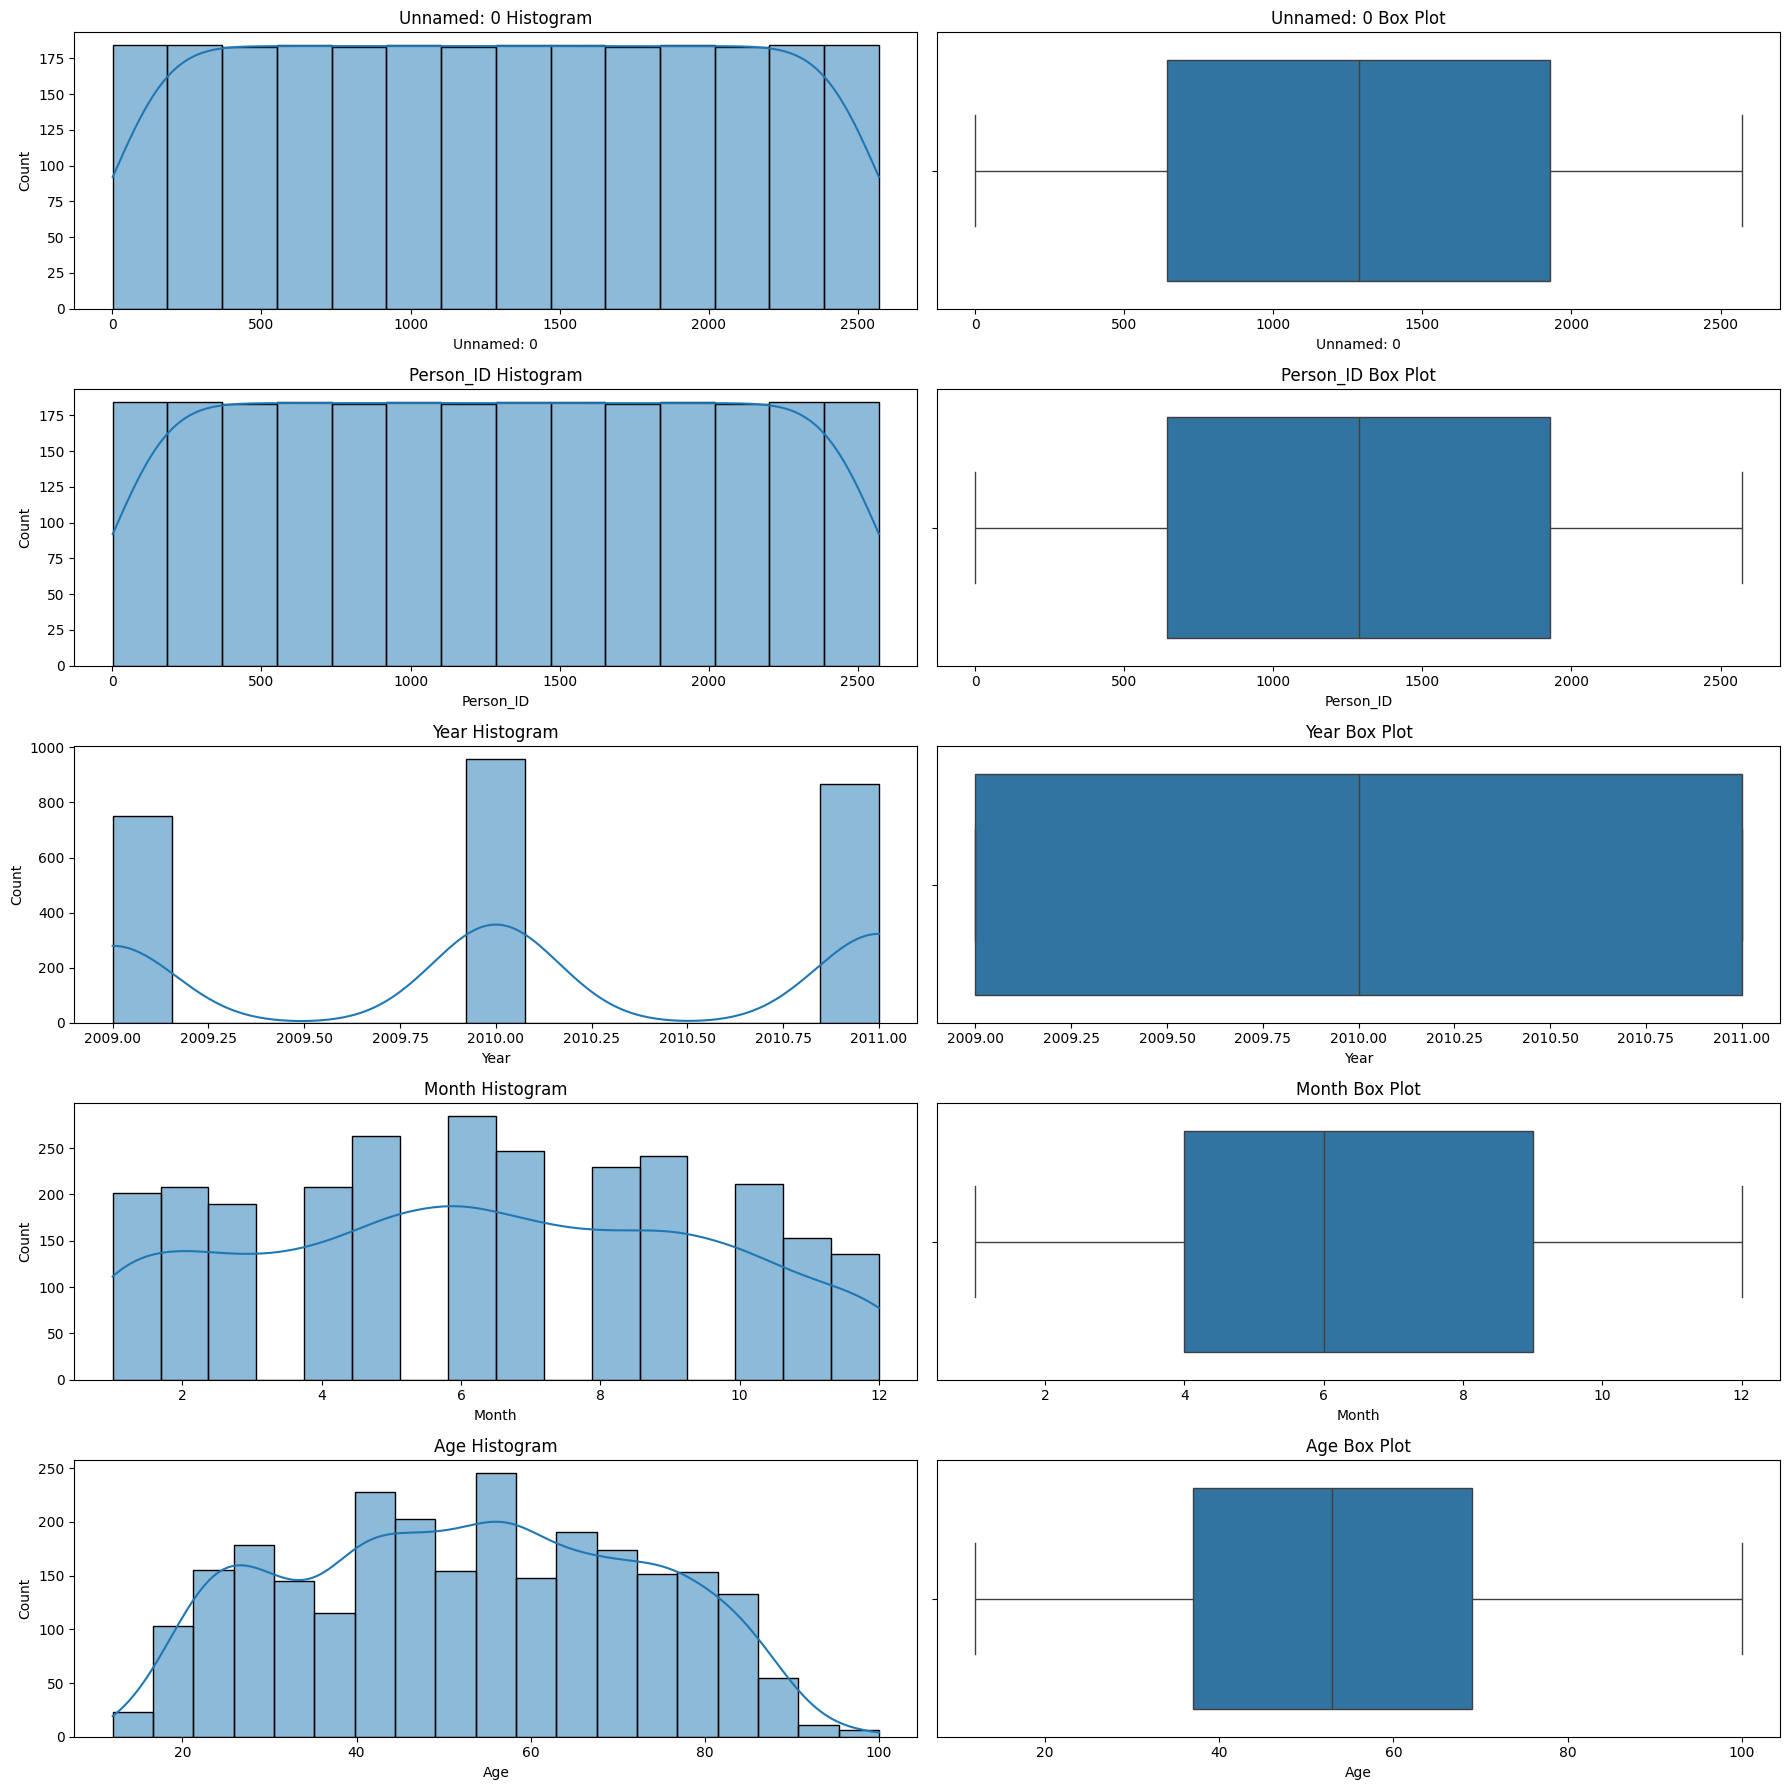

In [22]:
#Data Visualization on Numerical Columns

num_col = df.select_dtypes(include=['int64', 'float64']).columns
fig, ax = plt.subplots(len(num_col), 2, figsize=(18, 18))

for i, c in enumerate(num_col):
    sns.histplot(df[c], kde=True, ax=ax[i, 0])
    sns.boxplot(x=df[c], ax=ax[i, 1])
    
    ax[i, 0].set_title(c + ' Histogram')
    ax[i, 1].set_title(c + ' Box Plot')

plt.tight_layout()
plt.show()


### Data Insights:

- Age:
    - The distribution shows noticeable variation across different age groups.
    - Most suicide cases are concentrated in adult and middle-aged groups.
    - The median age lies within the central adult age range.
    - A few outliers are observed at very young and very old ages.

- Year:
    - The distribution of cases across years appears relatively uniform.
    - No strong skewness is observed, indicating stable reporting over time.
    - The median year lies near the center of the dataset timeline.
    - Minor fluctuations suggest slight temporal variation.

- Month:
    - The distribution across months is fairly balanced.
    - Some months show marginally higher frequencies, suggesting possible seasonality.
    - The median month lies around the middle of the year.
    - No extreme outliers are present due to the bounded nature of month values.


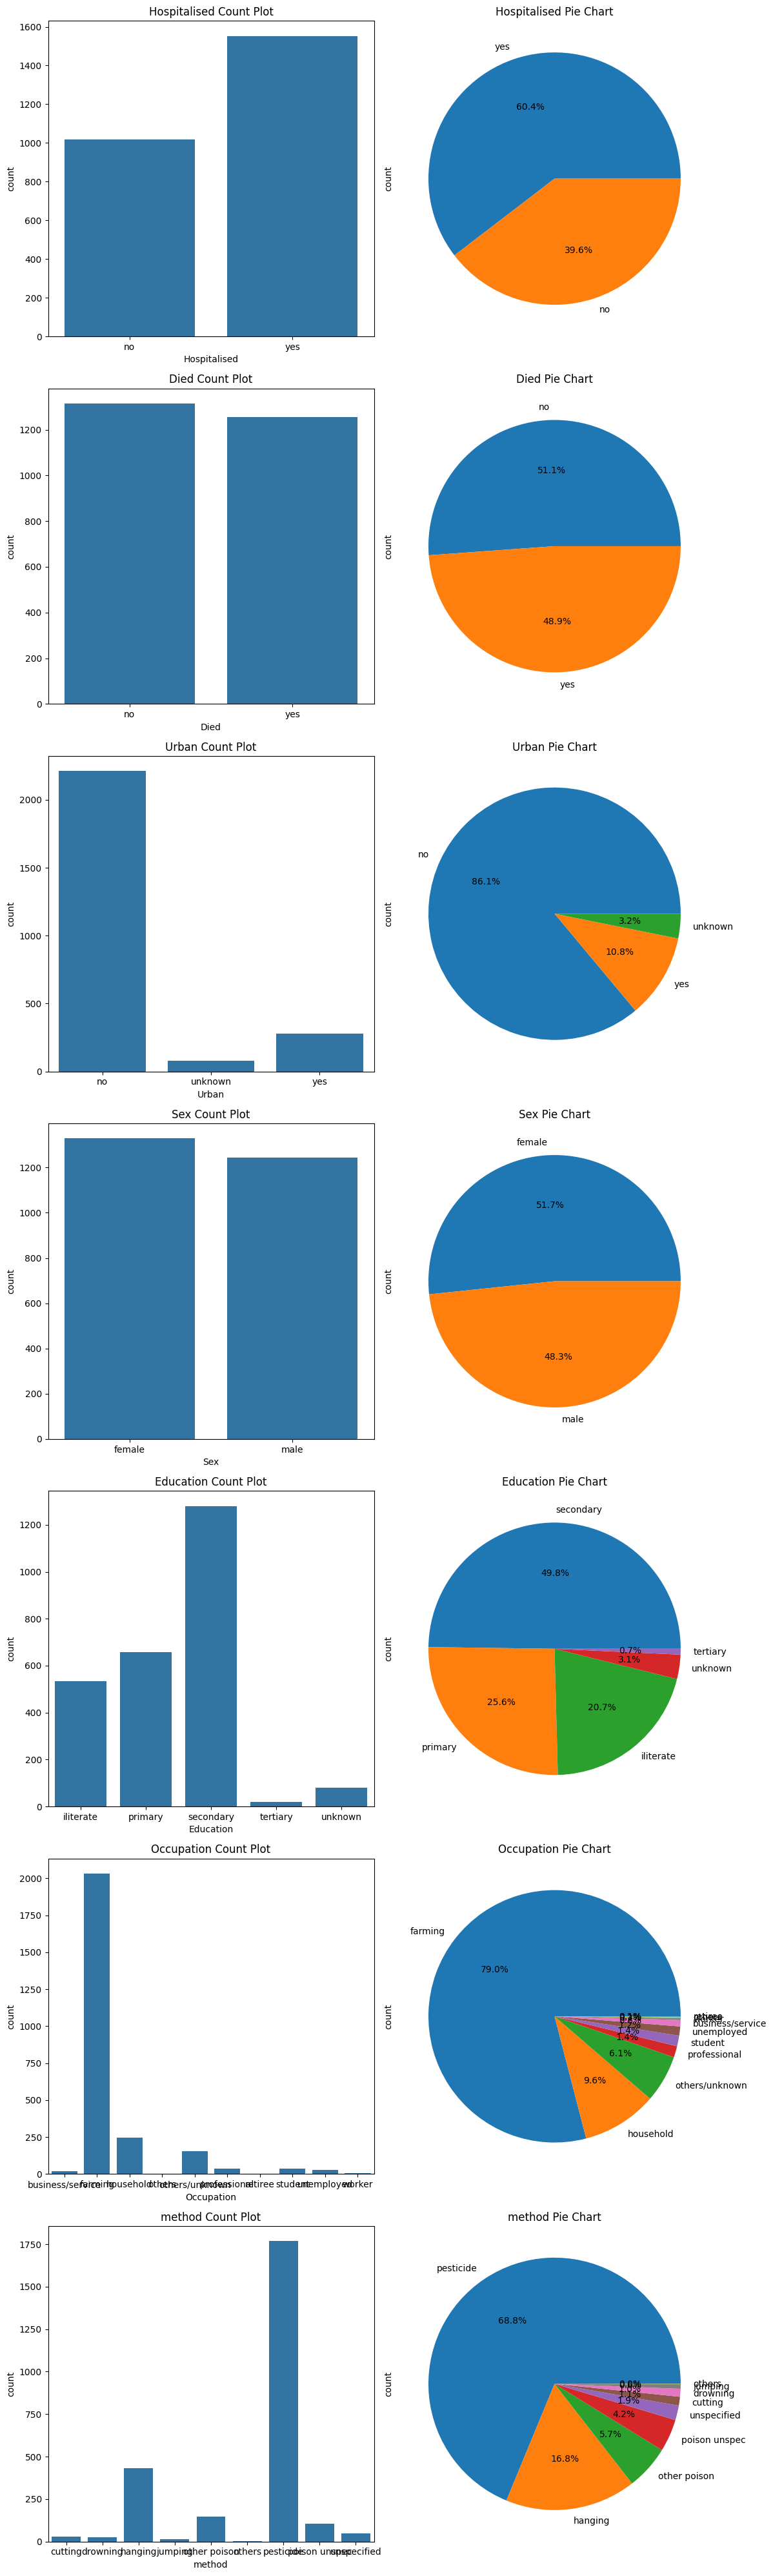

In [27]:
#Data Visualization on Categorical Columns

cat_col = df.select_dtypes(include='category').columns

fig, ax = plt.subplots(len(cat_col), 2, figsize=(12, 40))

for i, c in enumerate(cat_col):
    sns.countplot(x=df[c], ax=ax[i, 0])
    df[c].value_counts().plot.pie(ax=ax[i, 1], autopct='%1.1f%%')
    
    ax[i, 0].set_title(c + ' Count Plot')
    ax[i, 1].set_title(c + ' Pie Chart')

plt.tight_layout()
plt.show()


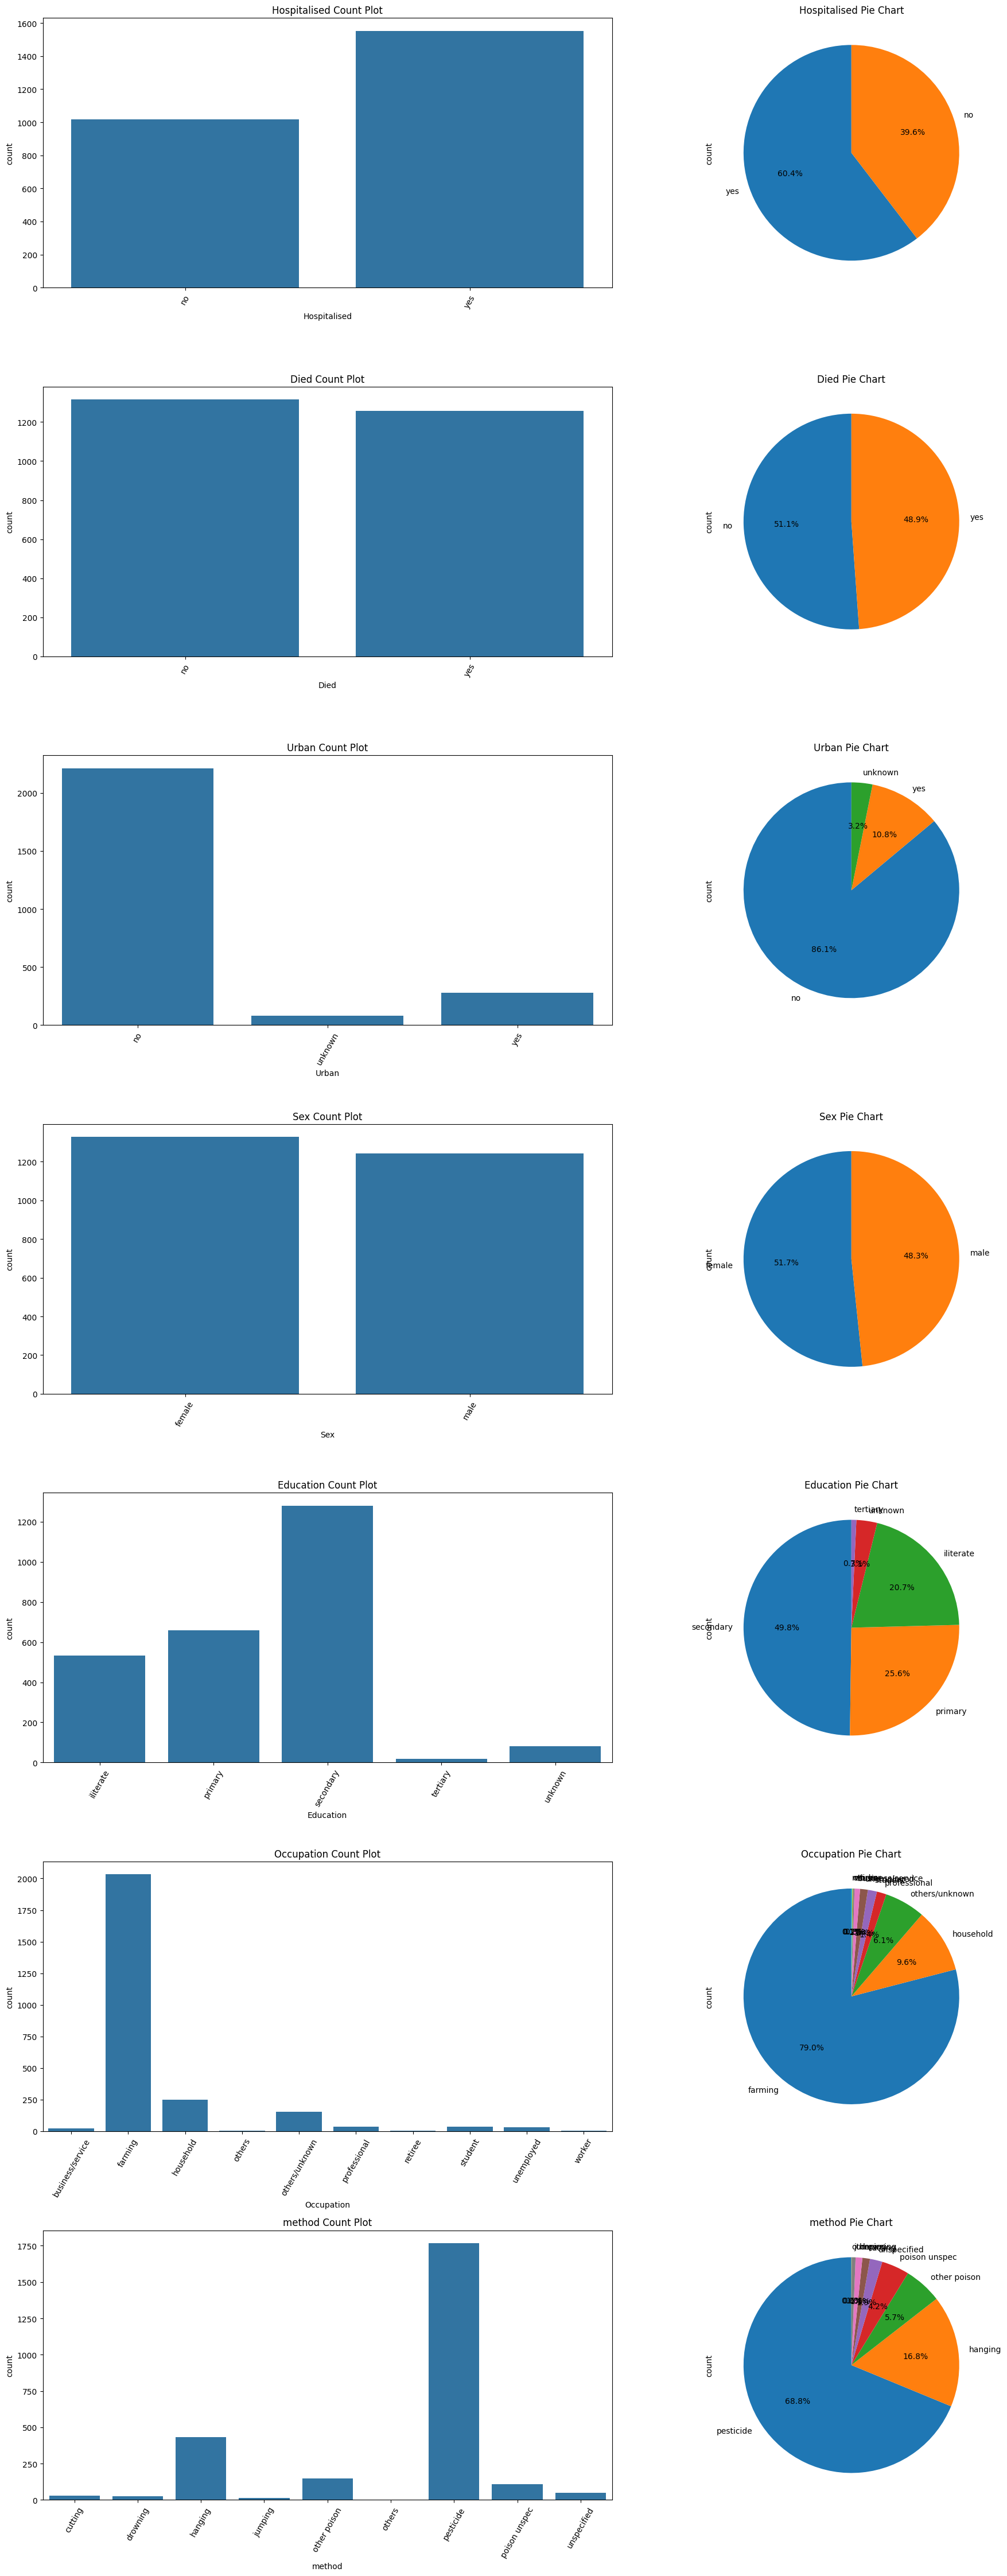

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_col = df.select_dtypes(include='category').columns

fig, ax = plt.subplots(len(cat_col), 2, figsize=(20, 45))

for i, c in enumerate(cat_col):
    
    # Count Plot
    sns.countplot(x=df[c], ax=ax[i, 0])
    ax[i, 0].tick_params(axis='x', rotation=60)
    ax[i, 0].set_title(c + ' Count Plot')
    
    # Pie Chart
    df[c].value_counts().plot.pie(
        ax=ax[i, 1],
        autopct='%1.1f%%',
        startangle=90
    )
    ax[i, 1].set_title(c + ' Pie Chart')

plt.tight_layout()
plt.show()


### Data Insights:

- Sex
    - The dataset is male-dominated, with a higher number of suicide cases reported among males than females.
    - This indicates that males are more vulnerable to suicide incidents in the given dataset.
    - Gender-based analysis may reflect social, occupational, or psychological factors.

- Hospitalised
    - Most individuals were hospitalised after the suicide attempt.
    - This suggests that medical intervention was available in a majority of cases.
    - Hospitalisation data helps understand the severity and response to suicide attempts.

- Died
    - A significant portion of individuals survived, while a smaller proportion resulted in death.
    - This shows that not all suicide attempts were fatal.
    - The outcome column helps differentiate between attempts and completed suicides.

- Urban
    - Suicide cases are reported from both urban and rural areas.
    - Slight variations indicate differences in living conditions and access to support systems.
    - Area-wise analysis helps understand location-based patterns.

- Education
    - Most individuals belong to primary or secondary education levels.
    - Higher education levels contribute a smaller proportion of cases.
    - Education may influence awarenmess, employment, and mental health support.

- Occupation
    - Farming is the most common occupation among reported cases.
    - Other occupations such as household work and labor contribute smaller proportions.
    - This highlights occupation-related stress and rural economic factors.

- Method
    - Hanging and pesticide consumption are the most frequently used methods.
    - Other methods contribute very small proportions.
    - Method analysis is important for understanding prevention strategies.

## BIVARIATE ANALYSIS

### Categorical vs Categorical

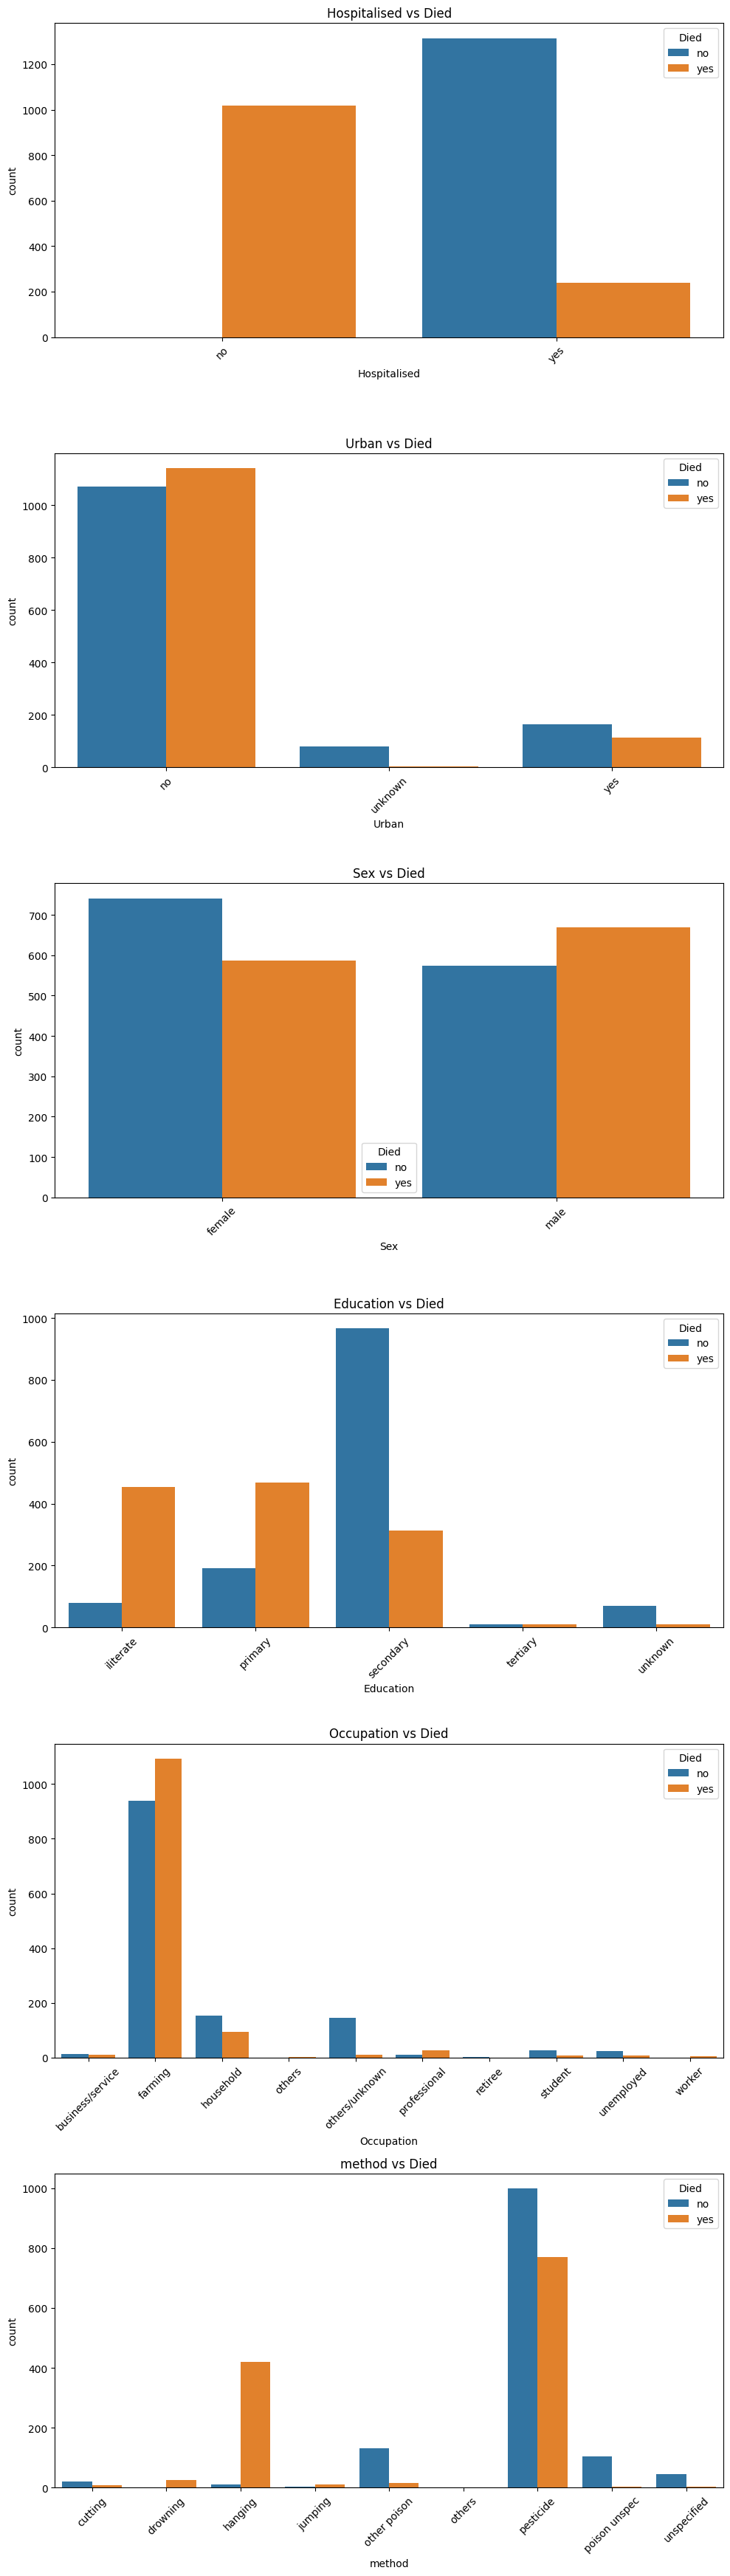

In [31]:
cat_cols = df.select_dtypes(include='category').columns

fig, ax = plt.subplots(len(cat_cols)-1, 1, figsize=(10, 35))

i = 0
for col in cat_cols:
    if col != 'Died':
        sns.countplot(x=df[col], hue=df['Died'], ax=ax[i])
        ax[i].set_title(col + ' vs Died')
        ax[i].tick_params(axis='x', rotation=45)
        i += 1

plt.tight_layout()
plt.show()

### Data Insights:
Since we have a target variable of **Died**, we can use it to analyze the relationship between *categorical columns* and *Died*.

* **Sex vs Died**
  * Male individuals account for a higher number of suicide-related deaths compared to females.
  * For both genders, the number of survivors is higher than deaths.
  * This suggests that males are more exposed to fatal outcomes, possibly due to social or psychological factors.

* **Hospitalised vs Died**
  * Most hospitalised individuals survived the suicide attempt.
  * Death cases are fewer among hospitalised individuals, indicating timely medical intervention.
  * This shows the importance of hospitalization in reducing fatal outcomes.

* **Urban vs Died**
  * Suicide outcomes vary between urban and rural areas.
  * Both areas show higher survival counts compared to deaths.
  * Location-based differences may reflect access to healthcare and support systems.

* **Education vs Died**
  * Individuals with primary or secondary education show higher counts of suicide cases.
  * Deaths are fewer across all education levels compared to survival.
  * Education level may influence awareness and access to help.

* **Occupation vs Died**
  * Farming-related occupations show the highest number of cases for both survival and death.
  * Other occupations have significantly lower counts.
  * Occupational stress and rural livelihood factors may contribute to these outcomes.

* **Method vs Died**
  * Certain methods show a higher number of fatal outcomes compared to others.
  * Non-fatal outcomes are more common overall.
  * Method choice plays an important role in determining suicide outcomes.


### Categorical vs Numerical

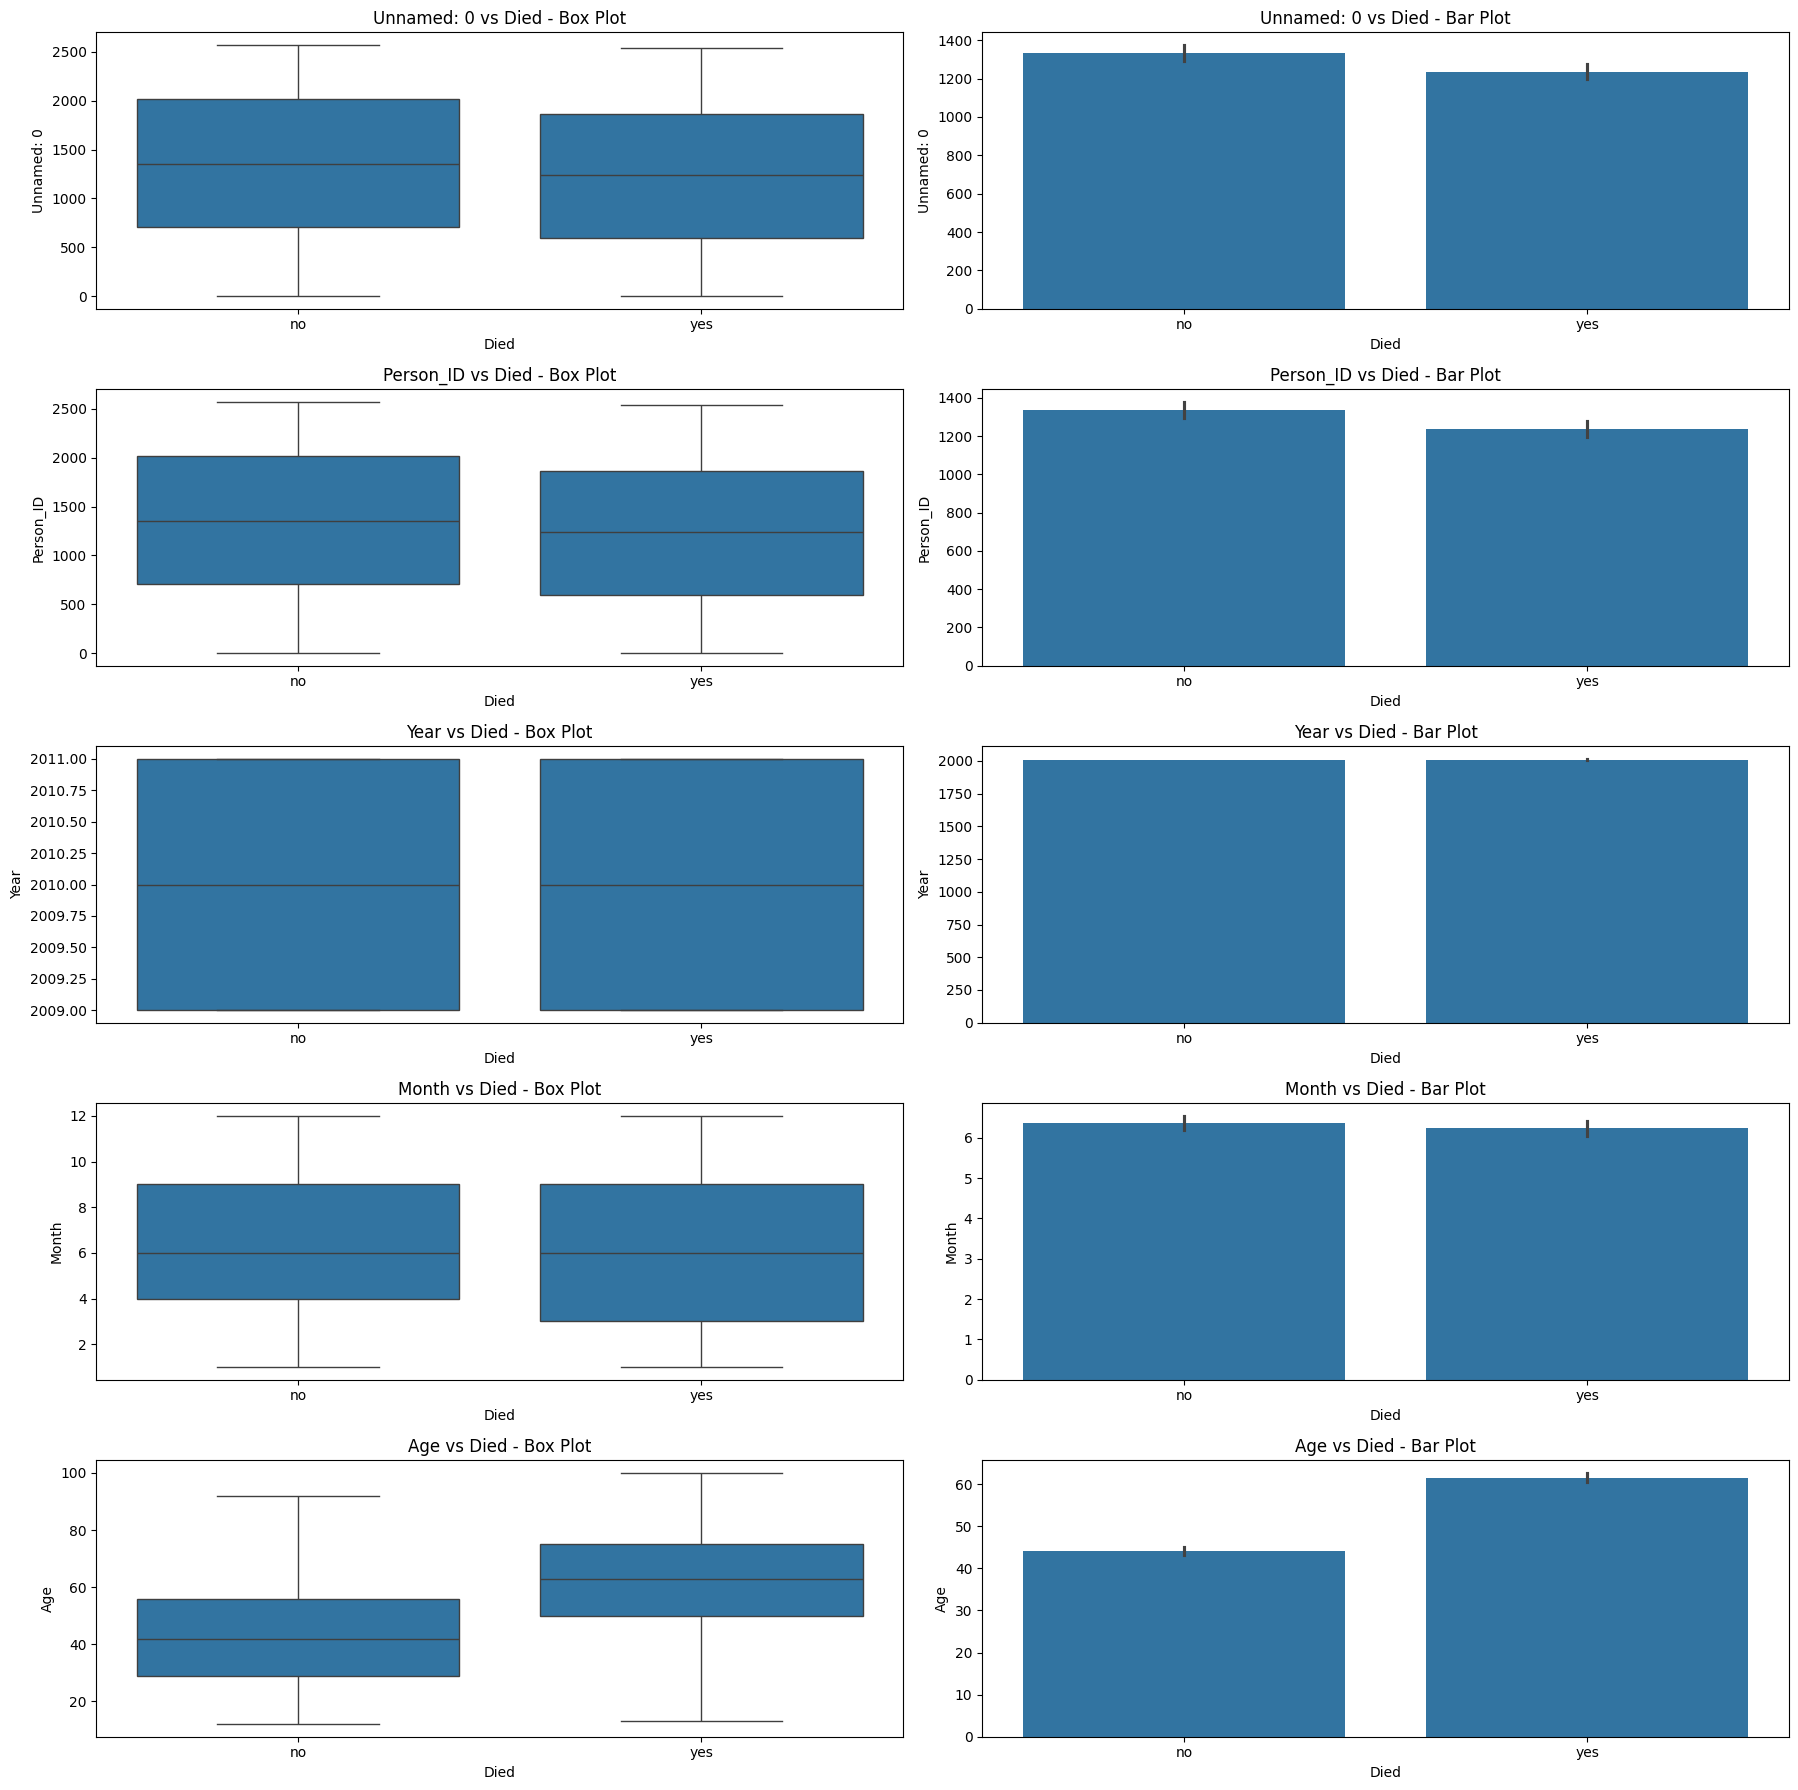

In [33]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
fig, ax = plt.subplots(len(num_cols), 2, figsize=(18, 18))

for i, col in enumerate(num_cols):
    
    # Box Plot
    sns.boxplot(x=df['Died'], y=df[col], ax=ax[i, 0])
    ax[i, 0].set_title(col + ' vs Died - Box Plot')
    
    # Bar Plot
    sns.barplot(x=df['Died'], y=df[col], ax=ax[i, 1])
    ax[i, 1].set_title(col + ' vs Died - Bar Plot')

plt.tight_layout()
plt.show()


### Data Insights:

* **Age & Died**

  * The median age is slightly higher for death cases compared to survived cases.
  * Both outcomes show a wide age range, with some extreme values.
  * Age shows a noticeable influence on suicide outcomes.

* **Year & Died**

  * The distribution of cases across years is similar for both outcomes.
  * No major difference is observed between survived and death cases over time.
  * Year shows minimal direct impact on the outcome.

* **Month & Died**

  * Suicide cases occur across all months for both outcomes.
  * Minor variations suggest possible seasonal patterns.
  * Month does not show a strong influence on suicide outcomes.


### NUMERICAL VS NUMERICAL

In [37]:
df = df.drop(columns=['Unnamed: 0'])

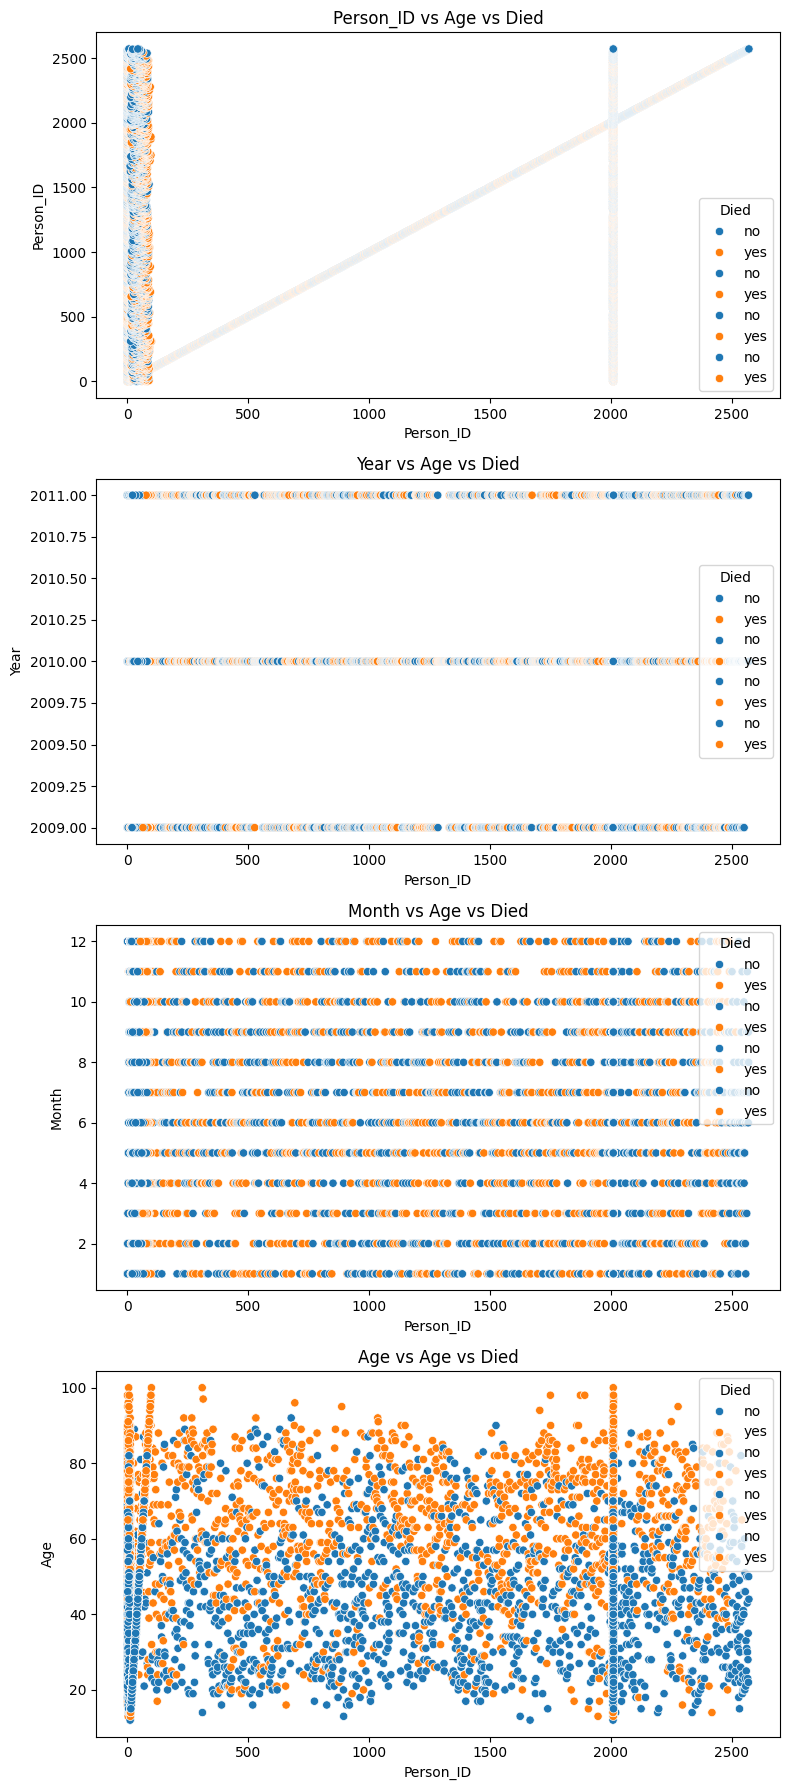

In [39]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
fig, ax = plt.subplots(len(num_cols), 1, figsize=(8, 18))

for i, col1 in enumerate(num_cols):
    for col2 in num_cols:
        sns.scatterplot(x=col2, y=col1, hue='Died', data=df, ax=ax[i])
        ax[i].set_title(f"{col1} vs {col2} vs Died")

plt.tight_layout()
plt.show()

<Axes: >

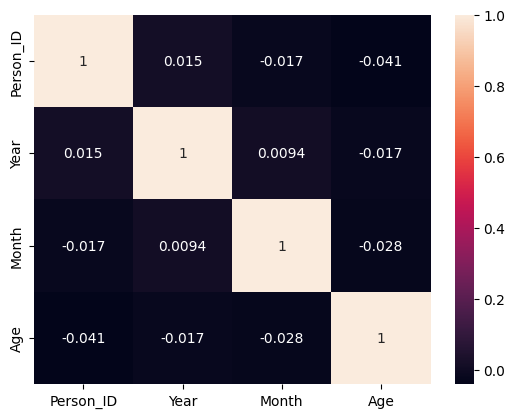

In [41]:
sns.heatmap(df[num_cols].corr(), annot=True)

### Data Insights: (Numerical Features vs Died):
* **Age**

  * Suicide outcomes are spread across a wide range of age groups.
  * Both death and survival cases appear at lower and higher ages.
  * This indicates that age alone has a limited influence on the outcome.

* **Year**

  * Suicide cases resulting in both death and survival are observed across all years.
  * No strong increasing or decreasing trend is visible for either outcome.
  * This suggests that year has a weak direct impact on suicide outcome.

* **Month**

  * Suicide cases occur throughout all months of the year for both outcomes.
  * Minor variations are observed, but no clear separation is visible.
  * Month shows minimal influence on suicide outcome.

* **Correlation Perspective**

  * Correlation values between Age, Year, and Month are generally weak.
  * No strong positive or negative relationships are observed among numerical variables.
  * Overall, numerical features show limited direct influence on suicide outcome, with categorical factors likely playing a stronger role.


## Summary:

### Issues found in the raw dataset
- The dataset contained an extra index column (**Unnamed: 0**) which did not add analytical value.
- Several categorical columns were stored as **object** instead of **category**.
- Minor inconsistencies in categorical text formatting were present.

#### How missing values and inconsistencies were resolved
- The unnecessary **Unnamed: 0** column was removed.
- Categorical text values were standardized by converting them to lowercase and removing extra spaces.
- Relevant categorical columns were converted from **object** to **category** data type.
- Numerical columns were verified to have appropriate data types.

#### Bivariate relationship insights
- Suicide outcomes vary across different categorical variables such as Sex, Education, Occupation, and Method.
- Hospitalisation shows a strong association with survival outcomes.
- Numerical variables (Age, Year, Month) show weak direct relationships with the outcome variable.
- **Target-oriented bivariate analysis** indicates that suicide outcomes are more influenced by categorical and contextual factors than by numerical features.

#### Confirmation that the data is clean and ready for analysis or modeling
- No missing values
- No duplicate records
- No unnecessary columns
- Correct and optimized data types

#### **This data is now ready for analysis and modeling.**
